In [69]:
#Importing all primary modules
# General imports
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
import warnings

warnings.filterwarnings("ignore")

In [70]:
#All sklearn modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [71]:
# Qiskit imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate

In [72]:
print("Successfully imported!!")

Successfully imported!!


In [73]:
from qiskit_machine_learning.kernels import QuantumKernel
print("fine")


fine


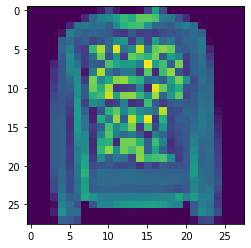

In [75]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
import matplotlib.pyplot as plt
plt.imshow(images[999])
# show 999th image
# This is a binary classification problem: we need to classify>> tshirt vs non-tshirt

In [76]:
sample_train, sample_val, labels_train, labels_val = train_test_split(
    images, labels, test_size=0.2, random_state=42)
# Visualize samples
fig = plt.figure()



<Figure size 432x288 with 0 Axes>

In [77]:
print("The shape of the X_train is {}".format( sample_train.shape))
print("The shape of the y_train is {}".format(labels_train.shape))

The shape of the X_train is (1600, 28, 28)
The shape of the y_train is (1600,)


In [78]:
print("The shape of the X_test is {}".format(sample_val.shape))
print("The shape of the y_test is {}".format(labels_val.shape))

The shape of the X_test is (400, 28, 28)
The shape of the y_test is (400,)


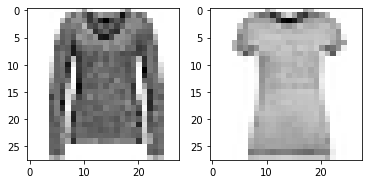

In [79]:
# Visualize samples
fig = plt.figure()

LABELS = [0, 1]
num_labels = len(LABELS)
for i in range(num_labels):
    ax = fig.add_subplot(1, num_labels, i+1)
    img = sample_train[labels_train==LABELS[i]][0].reshape((28, 28))
    ax.imshow(img, cmap="Greys")

In [80]:
LABELS

[0, 1]

In [81]:
'''import numpy as np
from sklearn.datasets import fetch_openml
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Load the Fashion MNIST dataset
#X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
X=images
X = X / 255.0

# Choose an image to encode
img = X[0].reshape(28 * 28)

# Initialize the qubits and classical bits
q = QuantumRegister(28 * 28)
c = ClassicalRegister(28 * 28)
qc = QuantumCircuit(q, c)

# Apply the amplitude encoding
for i in range(28 * 28):
    qc.u3(img[i], 0, np.pi, q[i])

# Measure the qubits
for i in range(28 * 28):
    qc.measure(q[i], c[i])

# Execute the circuit on a backend
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1).result()

# Extract the measurement result
encoded_img = result.get_counts().popitem()[0]



import numpy as np
from sklearn.datasets import fetch_openml
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

X=images[0]

# Choose an image to encode
img = X[0].reshape(28 * 28)

# Initialize the qubits and classical bits
q = QuantumRegister(24)
c = ClassicalRegister(24)
qc = QuantumCircuit(q, c)

# Split the image into 3 parts
img_part1 = img[:8]
img_part2 = img[8:16]
img_part3 = img[16:]

# Apply the amplitude encoding to each part
for i in range(8):
    qc.u3(img_part1[i], 0, np.pi, q[i])

for i in range(8, 16):
    qc.u3(img_part2[i - 8], 0, np.pi, q[i])

for i in range(16, 24):
    qc.u3(img_part3[i - 16], 0, np.pi, q[i])

# Measure the qubits
for i in range(24):
    qc.measure(q[i], c[i])

# Execute the circuit on a backend
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1).result()

# Extract the measurement result
encoded_img = result.get_counts().popitem()[0]'''

"import numpy as np\nfrom sklearn.datasets import fetch_openml\nfrom qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister\n\n# Load the Fashion MNIST dataset\n#X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)\nX=images\nX = X / 255.0\n\n# Choose an image to encode\nimg = X[0].reshape(28 * 28)\n\n# Initialize the qubits and classical bits\nq = QuantumRegister(28 * 28)\nc = ClassicalRegister(28 * 28)\nqc = QuantumCircuit(q, c)\n\n# Apply the amplitude encoding\nfor i in range(28 * 28):\n    qc.u3(img[i], 0, np.pi, q[i])\n\n# Measure the qubits\nfor i in range(28 * 28):\n    qc.measure(q[i], c[i])\n\n# Execute the circuit on a backend\nbackend = Aer.get_backend('statevector_simulator')\nresult = execute(qc, backend, shots=1).result()\n\n# Extract the measurement result\nencoded_img = result.get_counts().popitem()[0]\n\n\n\nimport numpy as np\nfrom sklearn.datasets import fetch_openml\nfrom qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister\nfrom q

In [82]:
sample_train= sample_train.reshape(1600, 28*28)
sample_val=sample_val.reshape(400,28*28)
ss = StandardScaler()
sample_train = ss.fit_transform(sample_train)
sample_val = ss.transform(sample_val)





In [83]:
# Reduce dimensions
N_DIM = 5
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(sample_train)
sample_val = pca.transform(sample_val)


In [85]:
# Normalize
mms = MinMaxScaler((-1, 1))
sample_train = mms.fit_transform(sample_train)
sample_val = mms.transform(sample_val)
print("fine")

fine


In [86]:
# 3 features, depth 1, linear entanglement
map_zz = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='linear')
map_zz.decompose().draw('mpl')
print("again fine")

again fine


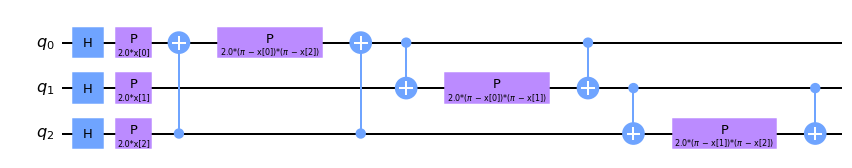

In [88]:
# 3 features, depth 1, circular entanglement
map_zz = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='circular')
map_zz.decompose().draw('mpl')

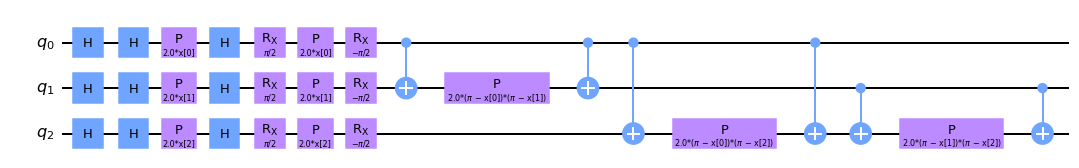

In [89]:
# 3 features, depth 1
map_pauli = PauliFeatureMap(feature_dimension=3, reps=1, paulis = ['X', 'Y', 'ZZ'])
map_pauli.decompose().draw('mpl')

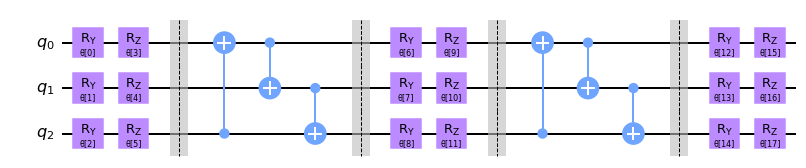

In [90]:
twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'], 
               entanglement_blocks='cx', entanglement='circular', insert_barriers=True)
twolocal.decompose().draw('mpl')

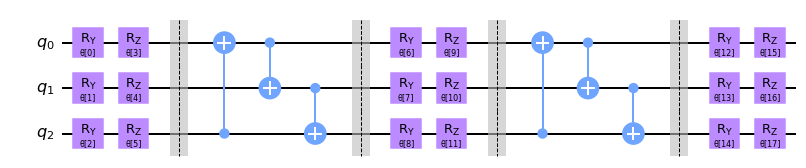

In [91]:
twolocaln = NLocal(num_qubits=3, reps=2,
               rotation_blocks=[RYGate(Parameter('a')), RZGate(Parameter('a'))], 
               entanglement_blocks=CXGate(), 
               entanglement='circular', insert_barriers=True)
twolocaln.decompose().draw('mpl')

In [92]:
print(f'First training data: {sample_train[0]}')

First training data: [-0.23461759  0.14360308 -0.74985009 -0.46295562 -0.70227781]


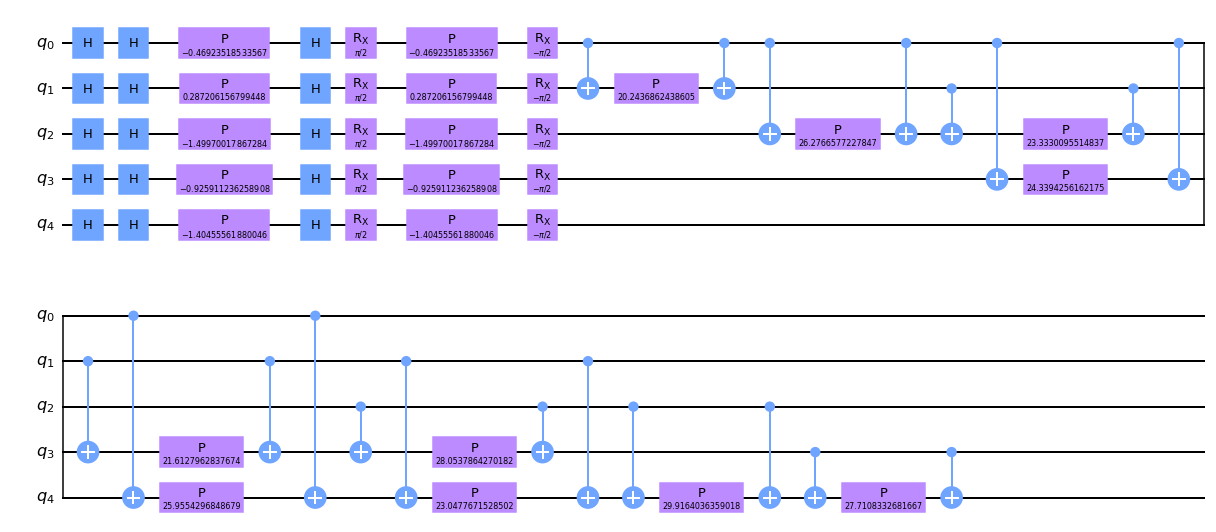

In [93]:
encode_map = PauliFeatureMap(feature_dimension=N_DIM, reps=1, paulis = ['X', 'Y', 'ZZ'])
encode_circuit = encode_map.bind_parameters(sample_train[0])
encode_circuit.decompose().draw(output='mpl')

In [94]:
pauli_map = PauliFeatureMap(feature_dimension=N_DIM, reps=1, paulis = ['X', 'Y', 'ZZ'])
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [95]:
pauli_map = PauliFeatureMap(feature_dimension=N_DIM, reps=1, paulis = ['X', 'Y', 'ZZ'])
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [96]:
print(f'First training data : {sample_train[0]}')
print(f'Second training data: {sample_train[1]}')

First training data : [-0.23461759  0.14360308 -0.74985009 -0.46295562 -0.70227781]
Second training data: [ 0.43180983 -0.19134105 -0.55347837 -0.64306782 -0.55827213]


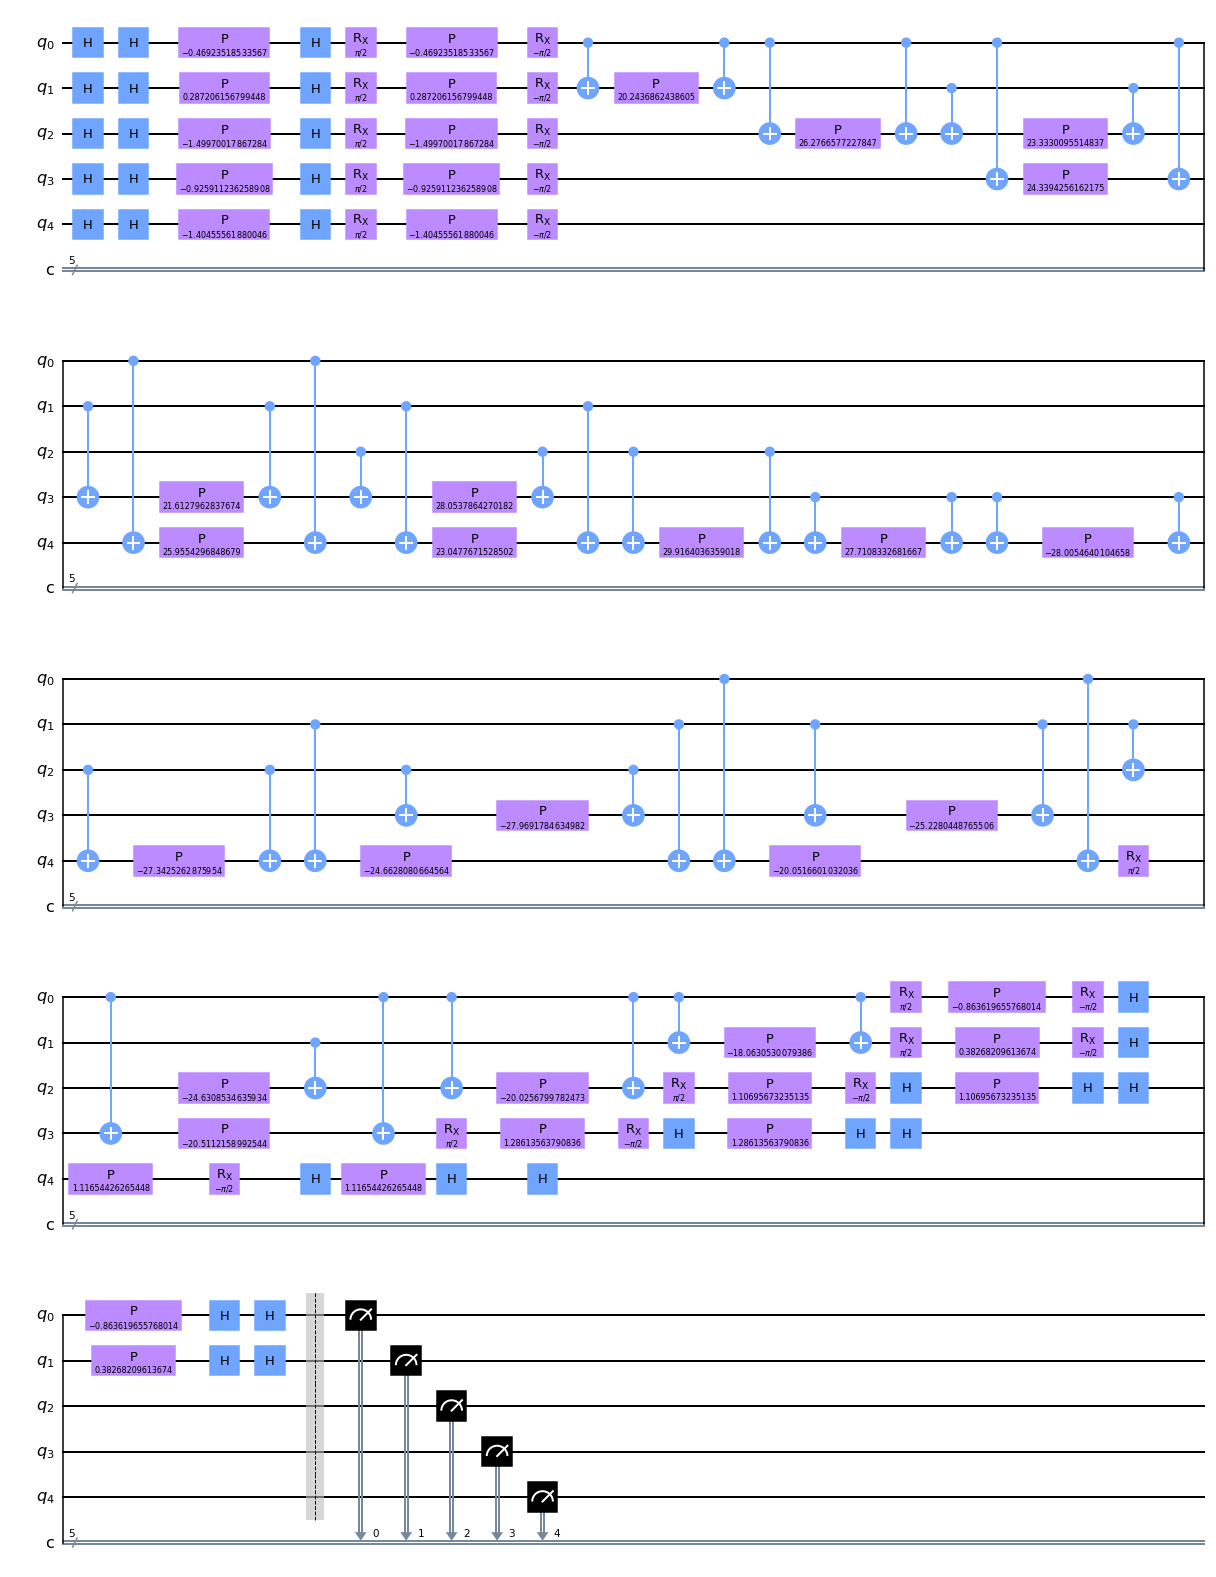

In [97]:
pauli_circuit = pauli_kernel.construct_circuit(sample_train[0], sample_train[1])
pauli_circuit.decompose().decompose().draw(output='mpl')

In [99]:
backend = Aer.get_backend('qasm_simulator')
job = execute(pauli_circuit, backend, shots=8192, 
              seed_simulator=1024, seed_transpiler=1024)
counts = job.result().get_counts(pauli_circuit)

In [100]:
print(f"Transition amplitude: {counts['0'*N_DIM]/sum(counts.values())}")

Transition amplitude: 0.0047607421875


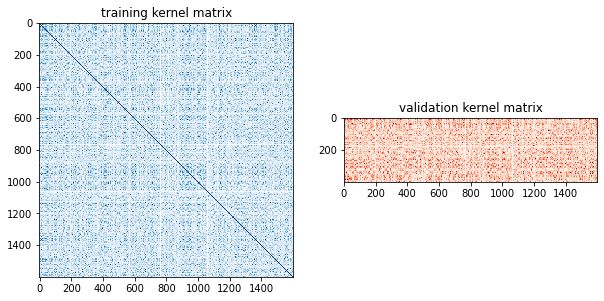

In [101]:
matrix_train = pauli_kernel.evaluate(x_vec=sample_train)
matrix_val = pauli_kernel.evaluate(x_vec=sample_val, y_vec=sample_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_val),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("validation kernel matrix")
plt.show()

In [102]:
pauli_svc = SVC(kernel='precomputed')
pauli_svc.fit(matrix_train, labels_train)
pauli_score = pauli_svc.score(matrix_val, labels_val)

print(f'Precomputed kernel classification test score: {pauli_score*100}%')

Precomputed kernel classification test score: 92.25%
